# HOMEWORK

#### QUESTION : 1

In [2]:
# HOW MANY MATCHES WON BY EACH TEAM IN 2016,2017 MAKE GRAPH
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
match_data = pd.read_csv("D:/REGEX/DAY_9/IPL Matches 2008-2020.csv")
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [3]:
match_data["date"]
match_data['date']=pd.to_datetime(match_data['date'])
match_data['season']=match_data['date'].dt.year

In [4]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               816 non-null    int64         
 1   city             803 non-null    object        
 2   date             816 non-null    datetime64[ns]
 3   player_of_match  812 non-null    object        
 4   venue            816 non-null    object        
 5   neutral_venue    816 non-null    int64         
 6   team1            816 non-null    object        
 7   team2            816 non-null    object        
 8   toss_winner      816 non-null    object        
 9   toss_decision    816 non-null    object        
 10  winner           812 non-null    object        
 11  result           812 non-null    object        
 12  result_margin    799 non-null    float64       
 13  eliminator       812 non-null    object        
 14  method           19 non-null     object   

In [5]:
# Group by season and winner, then count the number of wins
season_matches = match_data.groupby(['season', 'winner']).size().reset_index(name='wins')


In [6]:
win_2016_2017=season_matches[(season_matches["season"]==2016) | (season_matches["season"]==2017)]
win_2016_2017

,season,winner,wins
68,2016,Delhi Daredevils,7
69,2016,Gujarat Lions,9
70,2016,Kings XI Punjab,4
71,2016,Kolkata Knight Riders,8
72,2016,Mumbai Indians,7
73,2016,Rising Pune Supergiants,5
74,2016,Royal Challengers Bangalore,9
75,2016,Sunrisers Hyderabad,11
76,2017,Delhi Daredevils,6
77,2017,Gujarat Lions,4


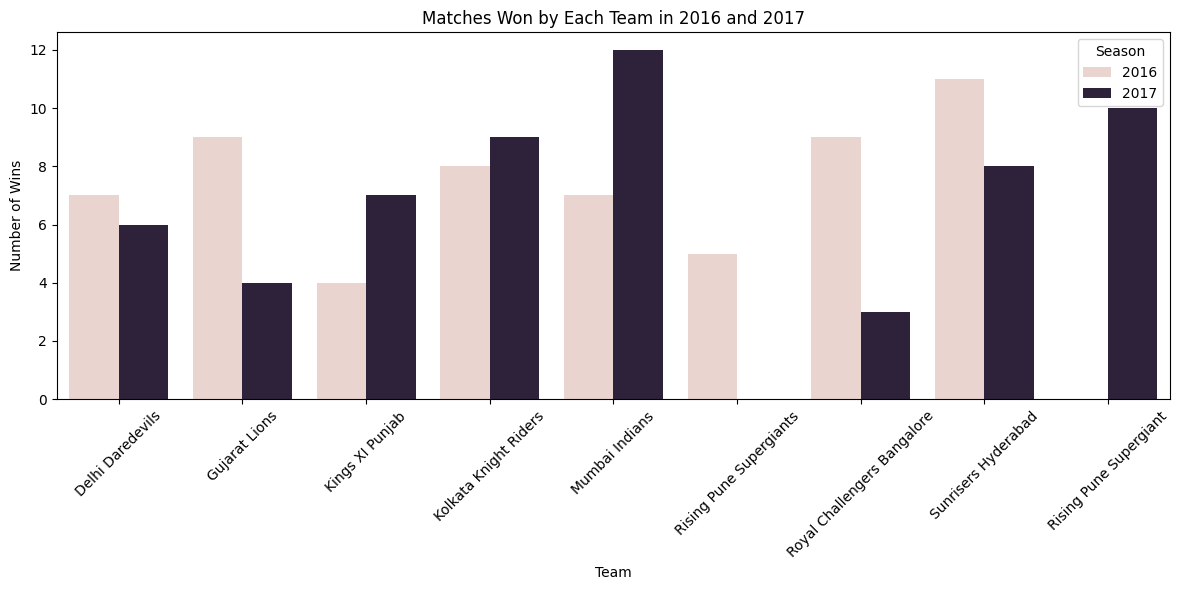

In [7]:
# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=win_2016_2017, x='winner', y='wins', hue='season')
plt.title('Matches Won by Each Team in 2016 and 2017')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.tight_layout()
plt.show()


#### using delivery dataframe year by year how many total number of runs we have scored in each season, total number of socore by each team in each season and PLOT LINE CHART

In [8]:
IPL_BALL_BY_BALL=pd.read_csv("D:/REGEX/DAY_9/IPL Ball-by-Ball 2008-2020.csv")

In [9]:
IPL_BALL_BY_BALL

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [10]:
IPL_BALL_BY_BALL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

# QUESTION 2

using delivery dataframe year by year how many total number of runs we have scored in each season, total number of socore by each team in each season(line chart)

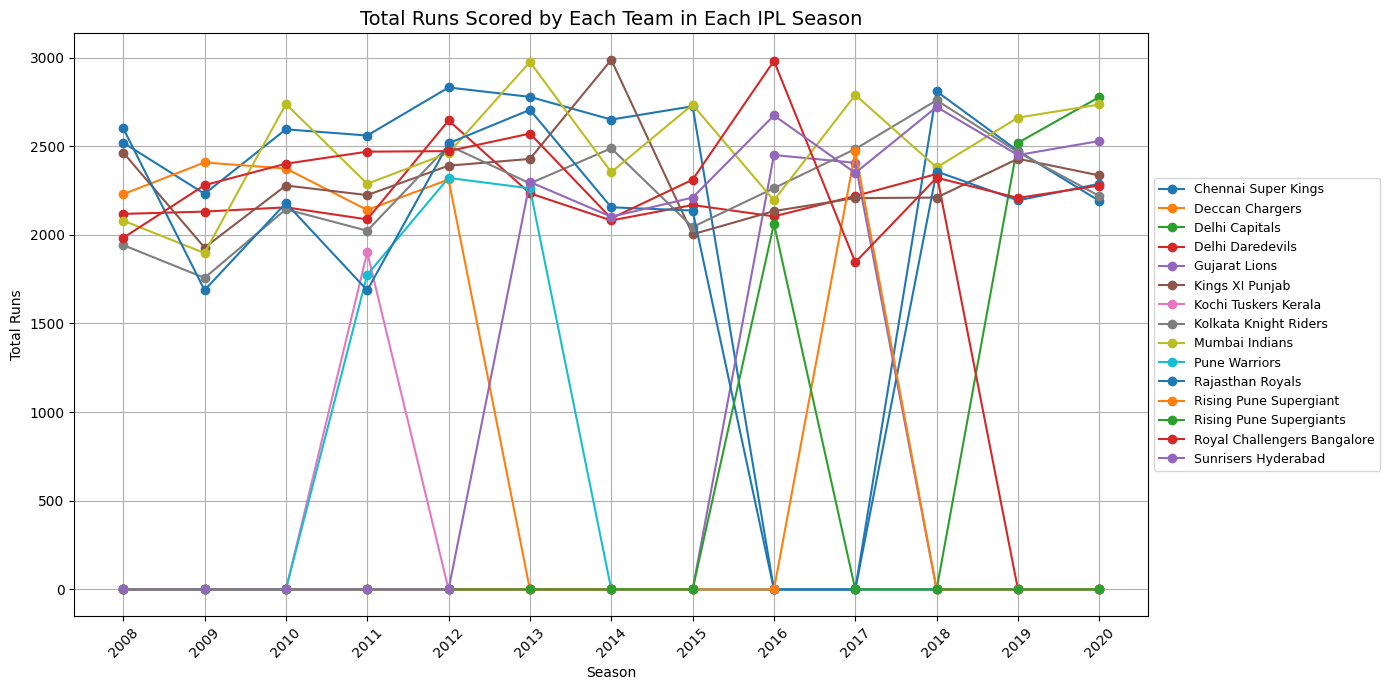

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Extract season info from match_data
match_data['date'] = pd.to_datetime(match_data['date'])
match_data['season'] = match_data['date'].dt.year
match_season = match_data[['id', 'season']]

# Step 2: Merge ball-by-ball with season info using match_id = id
ball_df = pd.read_csv('D:/REGEX/DAY_9/IPL Ball-by-Ball 2008-2020.csv')  # Replace with actual path if needed
merged_df = ball_df.merge(match_season, on='id')

# Step 3: Group by season and batting_team, and calculate total runs
season_team_runs = merged_df.groupby(['season', 'batting_team'])['total_runs'].sum().reset_index()

# Step 4: Pivot for plotting
pivot_df = season_team_runs.pivot(index='season', columns='batting_team', values='total_runs').fillna(0)

# Step 5: Plot
plt.figure(figsize=(14, 7))
for team in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[team], marker='o', label=team)

plt.title("Total Runs Scored by Each Team in Each IPL Season", fontsize=14)
plt.xlabel("Season")
plt.ylabel("Total Runs")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)
plt.grid(True)
plt.xticks(pivot_df.index, rotation=45)
plt.tight_layout()
plt.show()


# QUESTION 3

GET THE TOP 5 WICKET TAKER THAT LBW

Top 5 Wicket Takers by LBW:
bowler
Rashid Khan       18
SP Narine         17
PP Chawla         17
R Ashwin          15
Sandeep Sharma    14
Name: count, dtype: int64


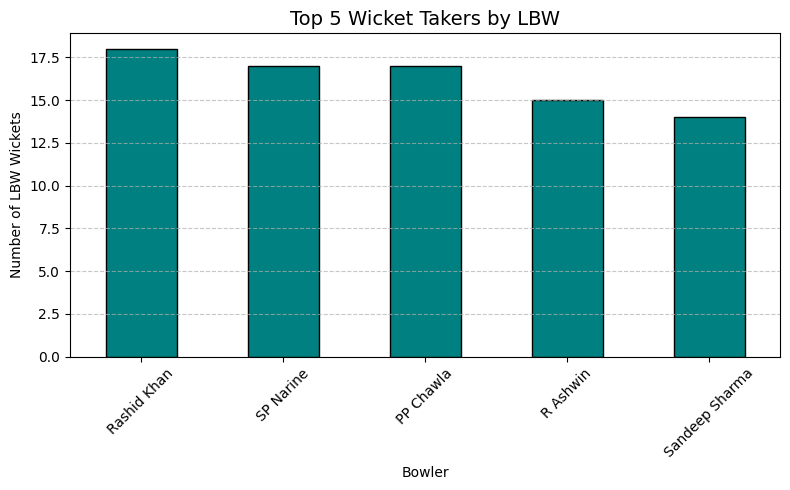

In [18]:
import pandas as pd

# Load data
ball_df = pd.read_csv('D:/REGEX/DAY_9/IPL Ball-by-Ball 2008-2020.csv')  # Replace with actual path

# Filter for LBW dismissals
lbw_df = ball_df[ball_df['dismissal_kind'] == 'lbw']

# Count LBW dismissals per bowler
top_lbw_wicket_takers = lbw_df['bowler'].value_counts().head(5)

# Display result
print("Top 5 Wicket Takers by LBW:")
print(top_lbw_wicket_takers)
plt.figure(figsize=(8, 5))
top_lbw_wicket_takers.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Top 5 Wicket Takers by LBW', fontsize=14)
plt.xlabel('Bowler')
plt.ylabel('Number of LBW Wickets')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# QUESTION 4

get the overall runs score by virat kohli 
1 -> total runs
2 -> total runs
4 -> total runs
6 -> total runs using pie chart or donut chart

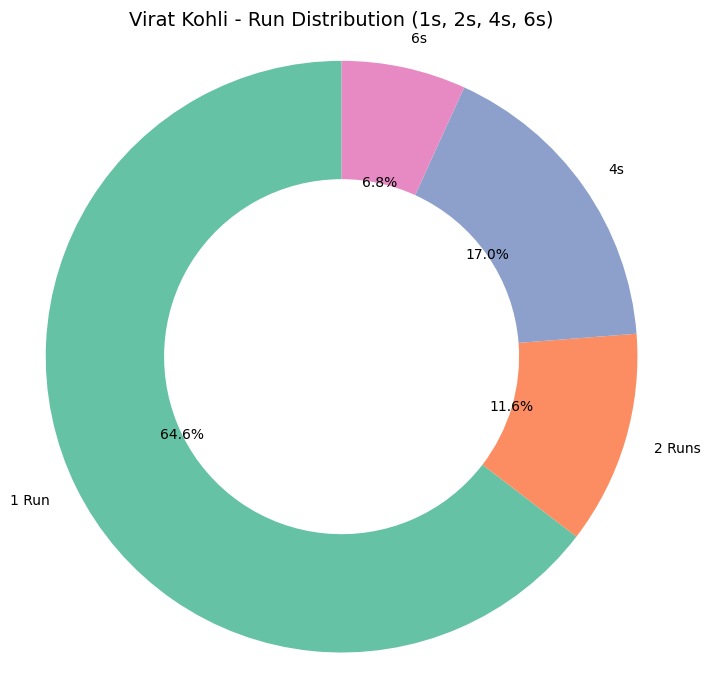

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
ball_df = pd.read_csv('D:/REGEX/DAY_9/IPL Ball-by-Ball 2008-2020.csv')  # Replace with actual path

# Filter only Virat Kohli's deliveries
kohli_df = ball_df[ball_df['batsman'] == 'V Kohli']

# Count runs scored per ball: only 1s, 2s, 4s, 6s
kohli_runs_count = kohli_df['batsman_runs'].value_counts().reindex([1, 2, 4, 6], fill_value=0)

# Labels and values
labels = ['1 Run', '2 Runs', '4s', '6s']
sizes = kohli_runs_count.values
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

# Plot as Donut Chart (pie chart with a hole)
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%', wedgeprops=dict(width=0.4))
plt.title("Virat Kohli - Run Distribution (1s, 2s, 4s, 6s)", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.tight_layout()
plt.show()
